### Data Science Job Salary Prediction

#### Context
Data of data science job posts from the website glassdoor are collected. This project aims to predict whether the salary is high or not. First, you will create a categorical variable `high_salary` based on the average salary `avg_salary`: if `avg_salary >= 150`, `high_salary = 1`; if `avg_salary < 150`, `high_salary = 0`. This new variable `high_salary` will be the prediction outcome. Note: Columns related to salary such as min, max, range of salary for prediction is not used because it will directly mean the model works perfectly.  <br>

#### Variables:
Described in the data description file.

### Module 1: Data Exploration
Load `jobs_train.csv` and explore the dataset. How do the data look like? Are there any missing values? What do you do with missing values, i.e. removal, imputation, etc.?<br>
Are there any outliers? What do you do with outliers, i.e. drop them, explore the effects of outliers on models, etc.? <br>
Record your analysis procedures. For example, 20 observations are removed due to missingness, and 400 observations remain for further analysis. <br>

---
###### Loading all essential libraries for the project

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import cross_val_score, KFold
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
warnings.simplefilter(action='ignore', category=FutureWarning)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows',None)

In [2]:
df= pd.read_csv(r"jobs_train.csv", delimiter=',')
print(f'The shape is {df.shape}')
display(df.head(4))

The shape is (530, 28)


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,0,Data Scientist,105-167,"Location: Redmond, WA\nClient: Microsoft (Un-M...",0.0,Pactera Edge,"Redmond, WA",-1,-1,-1,...,-1,1,0,0,0,0,0,0,data scientist,na
1,1,Analytics - Business Assurance Data Analyst,124-198,Analytics - Business Assurance Data Analyst (C...,4.6,GreatAmerica Financial Services,"Cedar Rapids, IA","Cedar Rapids, IA",501 to 1000 employees,Company - Private,...,28,0,1,0,0,0,1,0,analyst,na
2,2,Data Scientist,91-150,Business Unit: Data Scientist Comcast brings t...,3.5,Comcast,"New York, NY","Philadelphia, PA",10000+ employees,Company - Public,...,57,1,0,0,0,1,1,0,data scientist,na
3,3,Principal Data Scientist,69-116,Job Requisition ID #\n20WD40121\nJob Title\nPr...,4.0,Autodesk,"San Francisco, CA","San Rafael, CA",5001 to 10000 employees,Company - Public,...,38,1,1,1,1,1,0,1,data scientist,senior


In [3]:
# Observing the dataset's nature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         530 non-null    int64  
 1   Job Title          530 non-null    object 
 2   Salary Estimate    530 non-null    object 
 3   Job Description    530 non-null    object 
 4   Rating             530 non-null    float64
 5   Company Name       530 non-null    object 
 6   Location           530 non-null    object 
 7   Headquarters       530 non-null    object 
 8   Size               530 non-null    object 
 9   Type of ownership  530 non-null    object 
 10  Industry           530 non-null    object 
 11  Sector             530 non-null    object 
 12  Revenue            530 non-null    object 
 13  min_salary         530 non-null    int64  
 14  max_salary         530 non-null    int64  
 15  avg_salary         530 non-null    int64  
 16  job_state          530 non

In [4]:
# Dropping the unnessary columns which won't be used in this analysis:

df.drop(['Unnamed: 0','Job Description','Salary Estimate','Company Name','Job Title','seniority','Headquarters',
         'job_state','same_state'],axis=1, inplace=True)
print(f'Shape after drop is : {df.shape}')
display(df.head())

Shape after drop is : (530, 19)


,Rating,Location,Size,Type of ownership,Industry,Sector,Revenue,min_salary,max_salary,avg_salary,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp
0,0.0,"Redmond, WA",-1,-1,-1,-1,-1,105,167,136,-1,1,0,0,0,0,0,0,data scientist
1,4.6,"Cedar Rapids, IA",501 to 1000 employees,Company - Private,Lending,Finance,$100 to $500 million (USD),124,198,161,28,0,1,0,0,0,1,0,analyst
2,3.5,"New York, NY",10000+ employees,Company - Public,-1,-1,$10+ billion (USD),91,150,120,57,1,0,0,0,1,1,0,data scientist
3,4.0,"San Francisco, CA",5001 to 10000 employees,Company - Public,Computer Hardware & Software,Information Technology,$2 to $5 billion (USD),69,116,92,38,1,1,1,1,1,0,1,data scientist
4,3.8,"Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),137,171,154,39,1,1,0,0,1,0,0,data scientist


---

<div style="background-color: #D3D3D3; padding: 10px;">
    
<p> 
Reasons for dropping these columns:

These are dropped because some of them were forbidden to be used on our prediction model (as per the project guidelines for instance: 'Salary Estimate'). Moreover, other columns such as 'Unnamed:0', 'Job Description', 'Company Name', etc., are not directly necessary for our model as they do not contribute relevant information or features essential for the specific task at hand and there presence might contribute to introducing noise into the training process. 

Furthermore, 'Job Title' columns seemed to be repetitive in meaning as another column (i.e 'job_simp'). "job_simp" was chosen over 'job title' because of its simplified nature which made it easier to understand what a particular job is.
</p>
</div>

<div style="background-color: #D3D3D3; padding: 10px;">
    
<p>
Instead of seperate columns for the programming expertise such as 'python', 'excel', 'hadoop' etc, I wanted to create a column which states how many softwares' expertise is favoured in particular jobs. I will be naming that new column as software_count which will just state the count of softwares. For instance if a particular row has ('Python':'0', Excel:'0', 'Hadoop':'1'} then software_count will have the value '1'. 

'Software_count' therefore covers the need of the all the columns signifying technical expertise ('python', 'excel', 'hadoop', 'spark', 'aws', 'tableau').  
</p>
</div>
 

---


In [5]:
software_columns = ['python', 'excel', 'hadoop', 'spark', 'aws', 'tableau']

df['software_count'] = df[software_columns].sum(axis=1) #The desired new column
df['high_salary'] = df['avg_salary'].apply(lambda x: 1 if x >= 150 else 0)

#Observing the properties for the new column
df_with_softwares_encodes = df.copy()
df.drop(software_columns, axis=1, inplace=True)

df.head()

,Rating,Location,Size,Type of ownership,Industry,Sector,Revenue,min_salary,max_salary,avg_salary,company_age,big_data,job_simp,software_count,high_salary
0,0.0,"Redmond, WA",-1,-1,-1,-1,-1,105,167,136,-1,0,data scientist,1,0
1,4.6,"Cedar Rapids, IA",501 to 1000 employees,Company - Private,Lending,Finance,$100 to $500 million (USD),124,198,161,28,0,analyst,2,1
2,3.5,"New York, NY",10000+ employees,Company - Public,-1,-1,$10+ billion (USD),91,150,120,57,0,data scientist,3,0
3,4.0,"San Francisco, CA",5001 to 10000 employees,Company - Public,Computer Hardware & Software,Information Technology,$2 to $5 billion (USD),69,116,92,38,1,data scientist,5,0
4,3.8,"Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),137,171,154,39,0,data scientist,3,1


In [6]:
# To reorder the columns in df
columns_order=['job_simp','Rating', 'Size', 'Type of ownership', 'min_salary', 'max_salary',
       'avg_salary','Sector','company_age','Revenue', 'big_data', 'Industry','Location','software_count',
       'high_salary']

df = df[columns_order]

---
<div style="background-color: #D3D3D3; padding: 10px;">
    
<p>
Checking for null values and dropping the rows corresponding to it, to make the data and prediction more accurate.
</p>
</div>

In [7]:
df.isnull().sum() # This returns the number of null values in each columns.

job_simp             0
Rating               0
Size                 0
Type of ownership    0
min_salary           0
max_salary           0
avg_salary           0
Sector               0
company_age          0
Revenue              0
big_data             0
Industry             0
Location             0
software_count       0
high_salary          0
dtype: int64

---

<div style="background-color: #D3D3D3; padding: 10px;">
    
<p>
Although this shows there is no null values there are still some incosistent values such as -1 or 'na'
which doesn't make much sense and will affect the accuracy of the prediction model. In this case there are not much viable ways to replace the values with something else such as using average values (as most of the missing datas are in binary form i.e either 0 or 1) .Therefore they are dropped instead.
</p>
</div>

---


In [8]:
#Droppping missing and inconsistent values

df = df[(df != '-1').all(axis=1)]
df = df[df['job_simp'] != 'na']
df.reset_index(drop=True, inplace=True)
df.shape

(423, 15)

In [9]:
# Creating new dataframe df_display which hold all the features of df and will be used in visualization section

df_display = df.copy() 

---
##### Outlier detection
Selecting some important columns based on observation whose outliers might have a serious impact on model building.

---

In [10]:
print(f'Before dropping outliers the shape of dataframe was {df.shape}')
df.columns

Before dropping outliers the shape of dataframe was (423, 15)


Index(['job_simp', 'Rating', 'Size', 'Type of ownership', 'min_salary',
       'max_salary', 'avg_salary', 'Sector', 'company_age', 'Revenue',
       'big_data', 'Industry', 'Location', 'software_count', 'high_salary'],
      dtype='object')

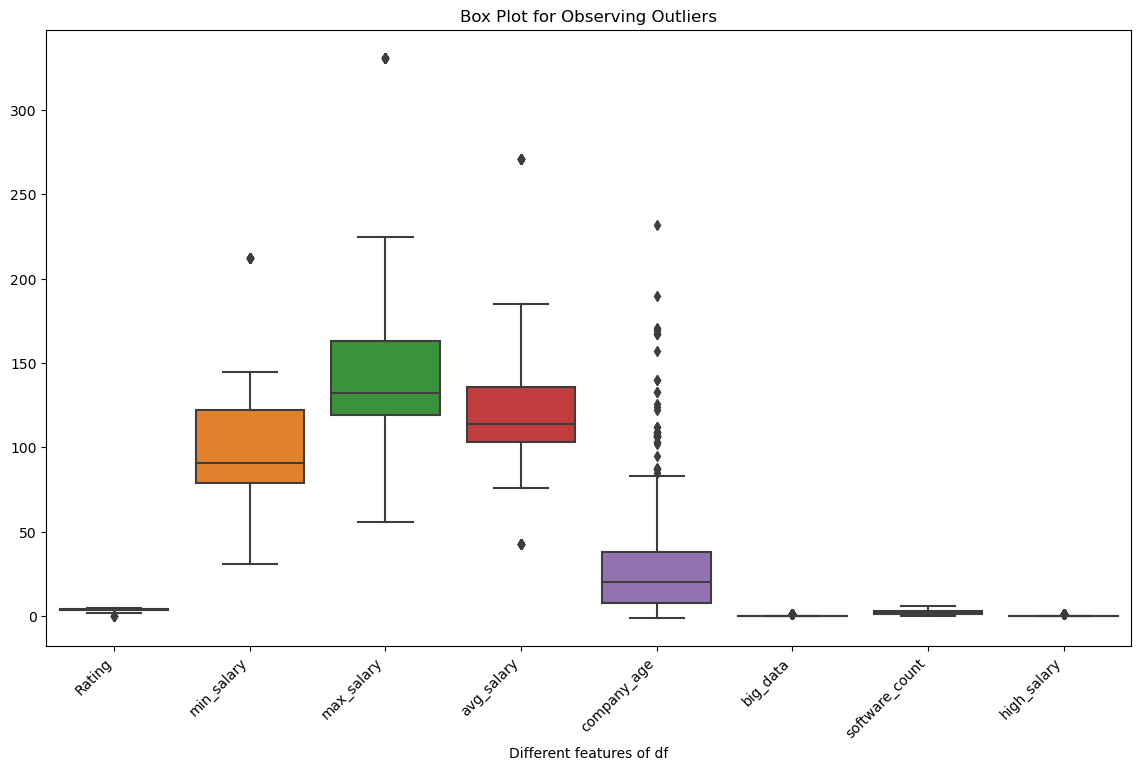

In [11]:
# Visualizing outliers using a box plot

plt.figure(figsize=(14, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Box Plot for Observing Outliers')
plt.xlabel('Different features of df')
plt.show()

---

<div style="background-color: #D3D3D3; padding: 10px;">
    
<p>
Company_age" seems to have a lot of outliers as per the box plot. 
Moreover, as other columns such as 'Rating', 'Company_age', 'software_count' are also to be used in the project it will
be better to remove any outliers in those columns for better model creation.  
</p>
</div>
 

---





In [12]:
# Selecting columns for outlier detection
outlier_detection_columns = ['Rating', 'company_age', 'software_count', 'avg_salary']

# Calculating the Interquartile Range (IQR) for each selected column
Q1 = df[outlier_detection_columns].quantile(0.25)
Q3 = df[outlier_detection_columns].quantile(0.75)
IQR = Q3 - Q1
threshold = 2.5

# Identifying and drop outliers in the selected columns
outliers = df[((df[outlier_detection_columns] < (Q1 - threshold * IQR)) | (df[outlier_detection_columns] > (Q3 + threshold * IQR))).any(axis=1)]
df.drop(outliers.index, inplace=True)

# Drop specified columns (Cannot be used because of project Guidelines)
columns_to_drop = ['min_salary', 'max_salary', 'avg_salary']
df.drop(columns=columns_to_drop, inplace=True)

print(f'The shape of the dataframe after dropping specified columns is {df.shape}')

The shape of the dataframe after dropping specified columns is (385, 12)


---

<div style="background-color: #D3D3D3; padding: 10px;">
    
<p>
'Type of ownership, Revenue, Location,Size, Industry and job_simp' are something we are considering to observe in our prediction model but it consists of categorical values. Hence, we will use categorical encoding measure to change that into more desired form.
    
</p>
</div>
 

---

In [13]:
df_encoded = pd.get_dummies(df, columns=['job_simp','Type of ownership','Size',
                                         'Industry','Revenue','Location','Sector'], drop_first=True)
print(df_encoded.shape) 
df_encoded.head(5)

(385, 248)


,Rating,company_age,big_data,software_count,high_salary,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,...,Sector_Insurance,Sector_Manufacturing,Sector_Media,Sector_Non-Profit,"Sector_Oil, Gas, Energy & Utilities",Sector_Real Estate,Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism
0,4.6,28,0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,38,1,5,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.8,39,0,3,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.9,109,0,2,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,4.1,-1,0,2,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<div style="background-color: #DAF7A6; padding: 10px;">
    <strong>Overall look on Module 1: </strong>
    
<p>


 In the module 1, I first loaded the `jobs_train.csv` dataset and initiated an exploration to understand its characteristics. The data initially was arranged in a dataframe with 530 rows and 19 colums. The columns mainly described the relationships between different factors such as rating, company_age, seniority, job title on max, min and average salary of a data science job. The dataset contains information about jobs, and I used methods like `head()`, `info() to gain insights into its structure, and data types. During this exploration, I tried to search for missing values using `isnull() but none were observed. I then decided to drop the values such as '-1' and 'na' because of their inconsitency and unavailability of proper measures to replace them with some other values.
    
For handling outliers, I visualized the distribution using box plots and opted to apply transformations to address skewness. This comprehensive approach aims to ensure a thorough understanding of the data and enhance the quality of subsequent analyses. I also identified and removed outliers from the datasets resulting in a thoroughly examined dataframe. Finally, since the columns in observations were categorical in types, so appropriate encoding measures were used to give us a column encoded dataframe (namely: df_encoded).
 
</p>
</div>


### Module 2: Data Visualization
What are the distributions of variables? Are the variables distributed differently in the high-salary group versus the low-salary group? Use tables and/or figures to visualize your exploration and findings. Present no more than 5 figures/tables that you think are important. For variables with similar patterns, you may state in your findings that variables a, b, c have similar patterns.

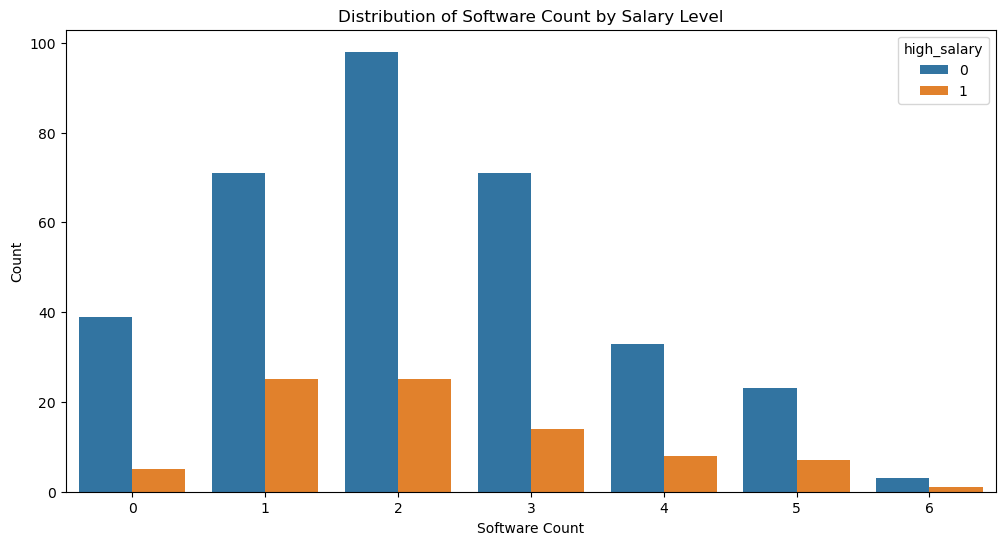

In [14]:
#Distribution of software_count

plt.figure(figsize=(12, 6))
sns.countplot(data=df_display, x='software_count', hue='high_salary')
plt.title('Distribution of Software Count by Salary Level')
plt.xlabel('Software Count')
plt.ylabel('Count')
plt.show()

---

<div style="background-color: #D3D3D3; padding: 10px;">
<p> 
While a prevalent stereotype suggests a positive correlation between technical expertise and higher salaries, this assumption doesn't always hold true. The depicted count plot illustrates a subtle upward trend between software count and high salaries, but it's noteworthy that the bars for low salaries also exhibit a similar incline. Additionally, in columns with higher software counts, the instances of low salaries surpass those of high salaries.
    
</p>
</div>
 

---

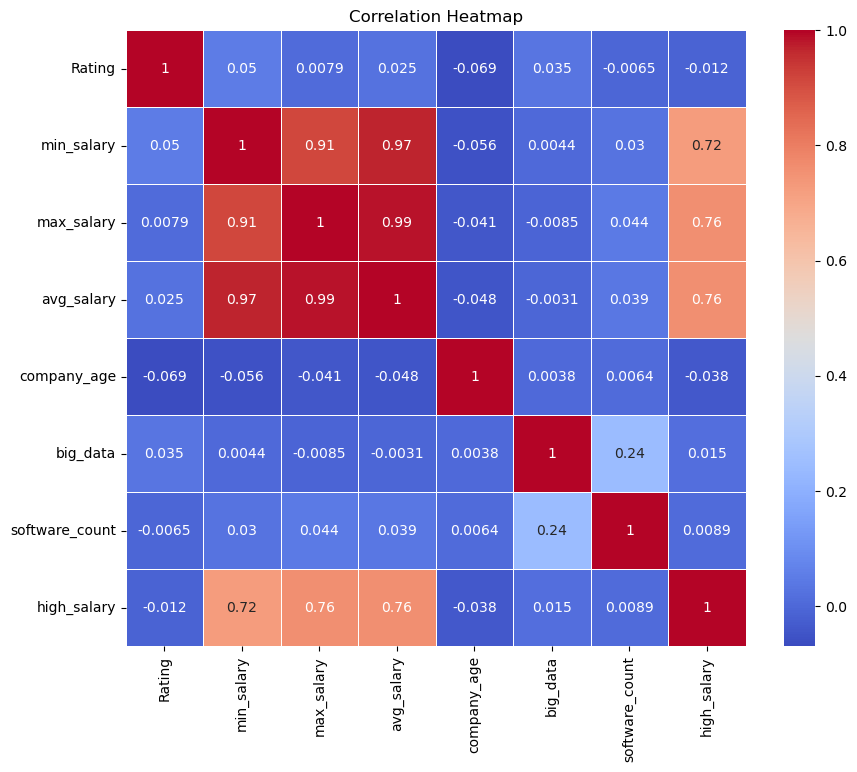

In [15]:
#Heatmap (plotting different variables' relationships)

plt.figure(figsize=(10, 8))
sns.heatmap(df_display.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

---

<div style="background-color: #D3D3D3; padding: 10px;">
    
<p>
The heatmap represents the relationship between different columns. Besides max_salary, min_salary, avg_salary, high_salary which are related because of their nature i.e salary itself, other variables do not show any proper correlation. For instance; company's age and high_salary are very feebly and negatively correlated.
    
</p>
</div>
 

---


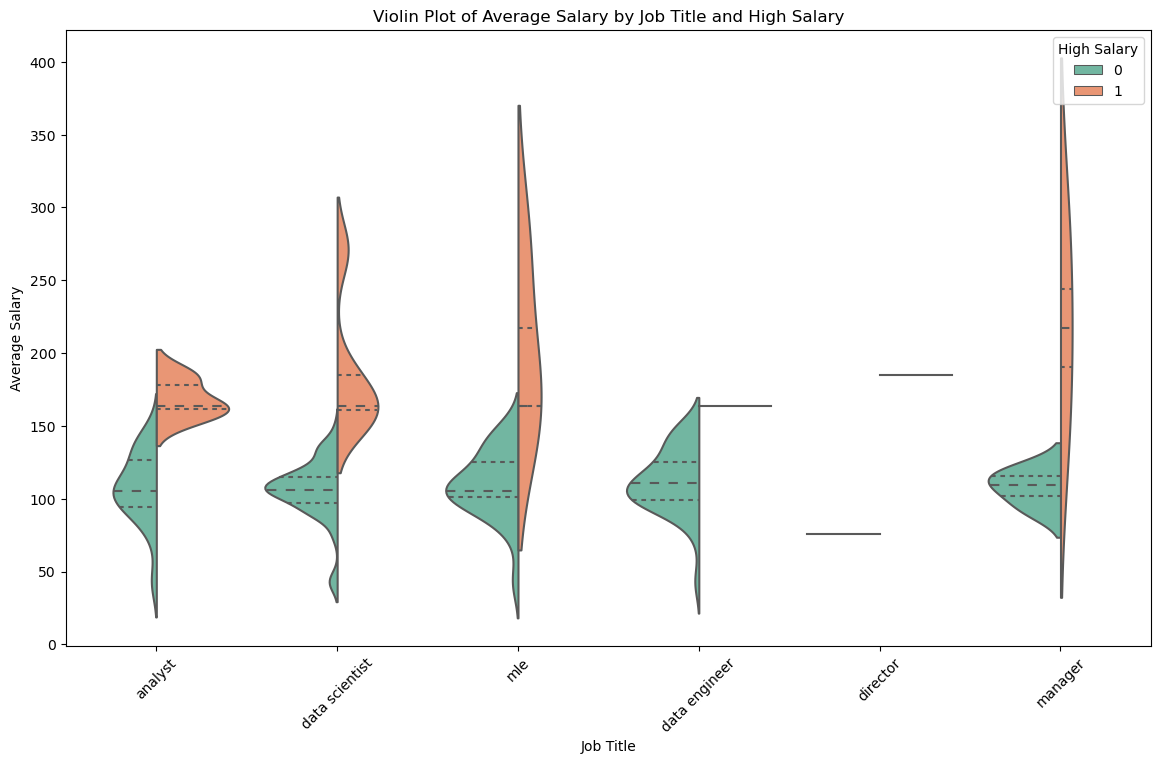

In [16]:
# A violinplot to show distribution of average salary in different jobs and splitting by high_salary

plt.figure(figsize=(14, 8))
sns.violinplot(x='job_simp', y='avg_salary', hue='high_salary', data=df_display, split=True, inner="quartile",
               palette="Set2")
plt.xticks(rotation=45)
plt.title('Violin Plot of Average Salary by Job Title and High Salary')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.legend(title='High Salary', loc='upper right')
plt.show()


---

<div style="background-color: #D3D3D3; padding: 10px;">
    
<p>

The violin plot shows the distribution between salaries for different job titles. By splitting based on 'high_salary' we can better understand the what higher and lower average salary can someone get in particular fields. For instance, in the job data scientist it can be observed that there is higher probability of getting lowest average salary of around 110 and higher average salary of around 160. These probability densities can infact be observed for all other job titles as well.
It can also be seen that director column is empty in violin plot. This is becuase of the fact that there is not much variability in that column as the job director only appears twice throughout the rows lacking variations.

    
</p>
</div>
 

---


big_data       0   1  Total
high_salary                
0            260  78    338
1             64  21     85
Total        324  99    423


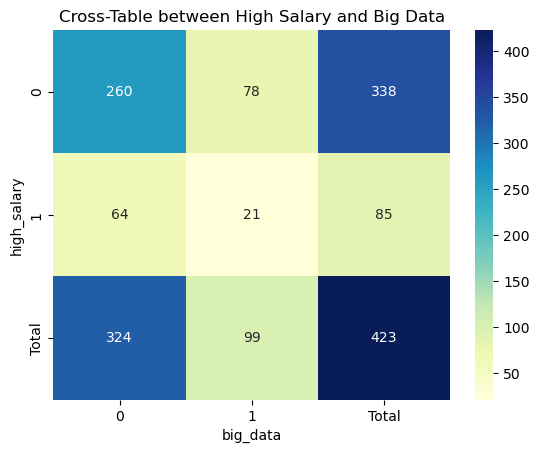

In [17]:
# Create a cross-tabulation

cross_table = pd.crosstab(df_display['high_salary'], df_display['big_data'], margins=True, margins_name="Total")

# Printing the cross-tabulation (table form)
print(cross_table)

# Ploting a heatmap for better visualization
sns.heatmap(cross_table, annot=True, cmap="YlGnBu", fmt='d', cbar=True)
plt.title('Cross-Table between High Salary and Big Data')
plt.show()


---------------------------------------------------------------------------------------

<div style="background-color: #D3D3D3; padding: 10px;">
    
<p>

Although in general, there is a belief that for high-paying jobs in the data science field, the knowledge of big data is crucial. However, as per this training data's cross-tabulation:

- When 'big_data' is 0, there are 260 instances where 'high_salary' is 0, suggesting that a significant portion of instances with lower salaries is associated with a lack of big data knowledge.
- In contrast, when 'big_data' is 0, there are 64 instances where 'high_salary' is 1, indicating that even without a strong emphasis on big data, there are still few chances of getting higher salaries.
- When 'big_data' is 1, there are 78 instances where 'high_salary' is 0, implying that having big data knowledge is not a guarantee for higher salaries alone.
- Additionally, with 'big_data' as 1, there are 21 instances where 'high_salary' is 1, supporting the belief that a subset of higher-paying jobs indeed requires proficiency in big data.

These insights suggest a fluctuating relationship between big data knowledge and high salaries in the context of this dataset.
      
</p>
</div>

---


<div style="background-color: #DAF7A6; padding: 10px;">
    <strong>Overall look on Module 2: </strong>
    
<p>
In examining the dataset, distinct patterns and relationships emerge across various variables. The count plot reveals a nuanced association between software counts and salary levels, challenging the conventional belief. The heatmap analysis underscores the interconnectedness of salary-related variables while highlighting a lack of substantial correlation among others.
    
Transitioning to the violin plot, it depicts salary distributions in different job titles, showcasing intriguing insights, such as varying probabilities of obtaining both lower and higher average salaries within specific roles. The exploration extends to the cross-tabulation of big data knowledge and high salaries, revealing a complex relationship. Instances with and without big data knowledge exhibit diverse salary outcomes, emphasizing the nuanced nature of factors influencing salary levels in the dataset. 
    
These findings collectively underscore the intricacy of salary determinants, encouraging a holistic consideration of multiple variables rather than relying on simplistic assumptions about the relationship between expertise, job titles, and salaries.
    
</p>
</div>


### Module 3: Dimension Reduction
Apply unsupervised learning methods to achieve dimension reduction. Visualize and interpret the results. Any dimension reduction algorithms can be used.

---------------------------------------------------------------------------------------

<div style="background-color: #D3D3D3; padding: 10px;">
    
<p>
The major work in this section is mainly to achieve these two:

- Finding out the net importances of each columns in predicting high_salary


- Dimension reduction of the least important ones to lower dimensions capturing the variance of whole
</p>
</div>

---


In [18]:
# i) Observing the net importances for each features

from sklearn.ensemble import RandomForestClassifier

# 'X' contains my other features and 'y' is my target variable (not now but during prediction this is how it will be)

X = df_encoded.drop(['high_salary'], axis=1)
y = df_encoded['high_salary']

# Fiting  a random forest mode to access feature importances for each columns

model = RandomForestClassifier()
model.fit(X, y)
feature_importances = model.feature_importances_

Importances = []
Feature_Imp = []
for feature, importance in zip(X.columns, feature_importances):
    Importances.append(importance)
    Feature_Imp.append((feature,importance))

print(f'The max feature importance is : {max(Importances)}')
print(f'Before dimension reduction the shape of df_encoded is {df_encoded.shape}')

The max feature importance is : 0.0737791225778052
Before dimension reduction the shape of df_encoded is (385, 248)


---

<div style="background-color: #D3D3D3; padding: 10px;">
    
<p>
It can be observed that almost all of the features exhibit really low feature importance value as even the max value is close to zero. So, it will be better to dimensionally reduce them. We can use a cumulative variance plot to see the optimal number of components to reduce the dimensions to. From the plot below it can be observed that (96) is the optimal ncomponents can strongly explain the variability of our data. 
    
</p>
</div>
 

---

<Figure size 1000x600 with 0 Axes>

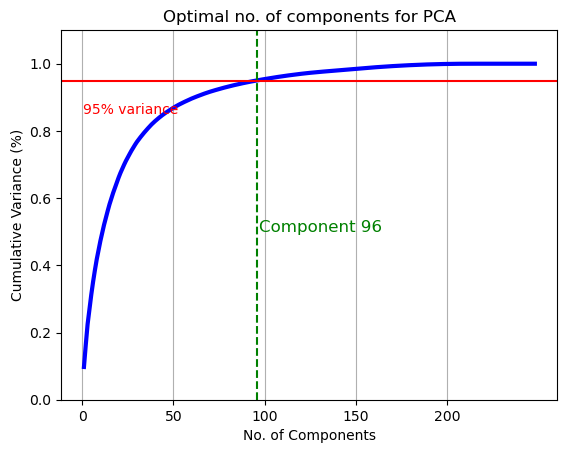

In [19]:
#SCaling the data first:

scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(df_encoded)
pca = PCA().fit(data_rescaled)

plt.figure(figsize=(10,6))
fig, ax = plt.subplots()

y = np.cumsum(pca.explained_variance_ratio_)
x = np.arange(1, len(y) + 1)

plt.plot(x, y, linestyle='-', color='b', linewidth=3)
plt.xticks(np.arange(0, max(x) + 1, step=50))

ax.set(xlabel ='No. of Components', ylabel ='Cumulative Variance (%)',
       ylim =(0.0, 1.1), 
       title ='Optimal no. of components for PCA')

# Adding a horizontal line to meet the intersections:
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% variance', color='red', fontsize=10)

# Finding the index where the curve intersects the horizontal line
intersection_index = np.where(y >= 0.95)[0][0]

# Adding a vertical line at the intersection point
plt.axvline(x=x[intersection_index], color='g', linestyle='--')
plt.text(x[intersection_index] + 1, 0.5, f'Component {x[intersection_index]}', color='green', fontsize=12)

ax.grid(axis='x')
plt.show()


---

<div style="background-color: #D3D3D3; padding: 10px;">
    
<p>
Since n-components is known we can now apply PCA by first standardizing the data.
Moreover, since our new features are supposed to explain 95% variability of previous columns it makes more sense to keep 
only the PCA features and drop all other former columns. This way our new shape of df_encoded becomes (385,97) which is
around half number of columns lesser than our previous dimension.
    
</p>
</div>
 

---




In [20]:
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

# Standardize the data before applying PCA
ncomp = 96
scaler = StandardScaler()
features = df_encoded
scaled_data = scaler.fit_transform(features)

# Applying PCA
pca = PCA(n_components=ncomp)
X_newD = pca.fit_transform(scaled_data)
df_encoded = df_encoded[['high_salary']] ##Keeping only the high_salary column in the dataframe
for i in range(1, ncomp + 1):
    df_encoded.loc[:, f'PC{i}'] = X_newD[:, i - 1]  ##Adding PCA columns in the dataframe

print(f"After Dimension reduction the shape of df_encoded is {df_encoded.shape}")

After Dimension reduction the shape of df_encoded is (385, 97)


In [21]:
# Designed to verify if test cases match the model's fitted columns, preventing prediction errors.
# To be used later during prediction

column_for_train = df_encoded.columns[-ncomp:].append(pd.Index(['high_salary']))

<div style="background-color: #DAF7A6; padding: 10px;">
    <strong>Overall look on Module 3: </strong>
    
<p>
In Module 3, the dimension reduction operation was performed to streamline the dataset by reducing the number of features. This process aimed to enhance computational efficiency, mitigate multicollinearity, and extract the most influential patterns within the data.
Principal Component Analysis (PCA) was employed as the chosen algorithm for this task, effectively transforming the original features into a set of orthogonal components while preserving the essential variance present in the dataset. 
    
</p>
</div>

|    Conditions        |  Dimensions    |
| ---------------------|----------------|
| Before  PCA          |     (385,248)  |
| After   PCA          |     (385,97)   |


### Module 4: Regression and Prediction
Choose three regression methods and build regression models based on data from `jobs_train.csv`, using five-fold cross-validation. <br>

Further, load `jobs_test.csv` and use it as the test dataset to evaluate your models and compare their performance. Consider visualizing the results, and evaluate the results using metrics such as the mean squared error. Which observations have the worst prediction and what are their characteristics? <br>

Note: we don't deduct points based on accuracy, as long as the models can be fitted correctly and the results are reasonable. However, if the model is wrong and does not yield meaningful and interpretable results, or if the results are interpreted incorrectly and wrong conclusions are drawn, points will be deducted.  

---
<div style="background-color: #D3D3D3; padding: 10px;">

Since our target variable is a binary type (with 0's and 1's), it was more meaningful to create a classifier model which could use other features and predict either high or low salary. The models chosen are:
- Logistic Regression
- Support Vector Machine
- Random Forest Classifier

These were selected because of their popularity in providing clear interpretation of feature impact on outcomes and ability to capture non-linear relationships.

</div>

---

In [22]:
# Creating the X_train_dataset and Y_train_dataset and creating a dictionary consisting of three models to be used.

train_data = df_encoded[column_for_train]
X_train_dataset = train_data.drop(['high_salary'], axis=1) # Holding the other features
y_train_dataset = train_data['high_salary']                # Holding the target variable

models = {
    'Logistic Regression':LogisticRegression(C=0.5, max_iter=1000) ,
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(n_estimators=1000, max_depth=100, max_features='sqrt')
}

---
<div style="background-color: #D3D3D3; padding: 10px;">

First evaluating the accuracy using 5 fold cross validation. First KFold is used to split the data into 5 non-overlapping 
folds. Those 5 folds is used as value for parameter for 'cv' in cross_val_score which calculates the accuracy of
the model.

</div>

---

In [23]:
# Split the data into train and validation sets:

X_train, X_val, y_train, y_val = train_test_split(X_train_dataset, y_train_dataset, random_state=42)

print("On the training process: ")
for model_name, model in models.items():
    
    #Splitting the data into 5 non-overlapping folds
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    #Perform 5-fold cross-validation on accuracy
    
    cv_acc = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    print(f'{model_name}: Average 5-fold Cross-Validation Accuracy: {cv_acc.mean()}')

    # Fitting the model
    model.fit(X_train, y_train)
    
    # Predicting and calculating accuracy on the validation set
    y_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_pred)
    print(f'{model_name}: Accuracy on Validation Set: {val_accuracy}')


On the training process: 
Logistic Regression: Average 5-fold Cross-Validation Accuracy: 0.9722928009679371
Logistic Regression: Accuracy on Validation Set: 0.9484536082474226
Support Vector Machine: Average 5-fold Cross-Validation Accuracy: 0.8227465214761039
Support Vector Machine: Accuracy on Validation Set: 0.8144329896907216
Random Forest: Average 5-fold Cross-Validation Accuracy: 0.833212341197822
Random Forest: Accuracy on Validation Set: 0.8247422680412371


---
<div style="background-color: #D3D3D3; padding: 10px;">

Among the three models used for cross validation by splitting the training sets. It can be observed that
LogisticRegression has the highest accuracy of 0.977. Also, the accuracy of that model in the validation set is higher suggesting that it is able to make correct predictions. Similarly other models such as Support vector classifier
and Random Forest also have good cross-val-accuracy of 0.822 and 0.826 respectively.

</div>

---



Loading and arranging the test_data to make it match the columns and features of train_data. Tasks such as dropping the columns which were dropped in df_encoded and also performing PCA to reduce the features to 102.

---

In [24]:
# Load test data
test_data = pd.read_csv(r"jobs_test.csv")
test_data['high_salary'] = test_data['avg_salary'].apply(lambda x: 1 if x >= 150 else 0)
test_data.drop(['Unnamed: 0','Job Description','Salary Estimate','Company Name','Job Title','seniority','Headquarters',
         'job_state','same_state'],axis=1, inplace=True)
test_data.head(5)

,Rating,Location,Size,Type of ownership,Industry,Sector,Revenue,min_salary,max_salary,avg_salary,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,high_salary
0,4.0,"Gaithersburg, MD",10000+ employees,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),56,97,76,107,1,1,0,0,0,0,0,data scientist,0
1,3.1,"New York, NY",201 to 500 employees,Company - Private,Computer Hardware & Software,Information Technology,$50 to $100 million (USD),90,124,107,20,1,1,0,0,1,0,0,data engineer,0
2,4.3,"New York, NY",51 to 200 employees,Company - Private,Internet,Information Technology,$100 to $500 million (USD),71,123,97,9,1,0,1,1,0,0,1,data scientist,0
3,4.2,"San Mateo, CA",201 to 500 employees,Company - Private,Lending,Finance,Unknown / Non-Applicable,90,109,99,8,1,0,0,0,0,0,0,data scientist,0
4,3.7,"Chantilly, VA",10000+ employees,Company - Public,Enterprise Software & Network Solutions,Information Technology,$5 to $10 million (USD),99,132,115,7,1,0,0,0,0,0,0,data scientist,0


In [25]:
# Creating the software_count as done before in train_data.

software_columns = ['python', 'excel', 'hadoop', 'spark', 'aws', 'tableau']

test_data['software_count'] = test_data[software_columns].sum(axis=1) #The desired new column


In [26]:
# Since software_count is already added dropping ['python','excel','hadoop','spark','aws','tableau']

test_data.drop(['python','excel','hadoop','spark','aws','tableau'],axis=1, inplace=True)
test_data.shape


(130, 15)

---
<div style="background-color: #D3D3D3; padding: 10px;">

Null values were removed from test data which is essential to maintain data consistency and enable accurate model evaluation.
Null values can introduce inconsistencies that might lead to incorrect predictions during model testing.

On the other hand, outliers are not removed from the test data as they represent real-world inconsistency and the model
are expected to work on the realisitc conditions.

</div>

---


In [27]:

test_data = test_data[(test_data != '-1').all(axis=1)]
test_data = test_data[test_data['job_simp'] != 'na']
test_data.reset_index(drop=True, inplace=True)
test_data.shape

(102, 15)

In [28]:
# Encoding the categorical variables in test_data

test_data = pd.get_dummies(test_data, columns=['job_simp','Type of ownership','Size','Industry',
                                               'Location','Revenue','Sector'], drop_first=True)
test_data.drop(['min_salary','max_salary','avg_salary'],axis=1, inplace=True)

test_data.columns
selected_columns_test= [x for x in test_data.columns if x not in ['high_salary']]

print(f"Before dimension reduction the shape of the test_data is {test_data.shape}")

Before dimension reduction the shape of the test_data is (102, 130)


In [29]:
# Dimension reduction of test_data 

features = test_data[selected_columns_test]

# Standardizing the data before applying PCA

scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Applying PCA with ncomp=102 as obtained before
pca = PCA(n_components=ncomp)
X_newD = pca.fit_transform(scaled_data)
test_data = test_data[['high_salary']]
for i in range(1, ncomp + 1):
    test_data.loc[:, f'PC{i}'] = X_newD[:, i - 1]

print(f"After dimension reduction the shape of the test_data is {test_data.shape}")

After dimension reduction the shape of the test_data is (102, 97)


---
<div style="background-color: #D3D3D3; padding: 10px;">

 To sum up: In the above few code blocks, test data was organized to align with the columns used during the training phase, ensuring compatibility for the subsequent model fitting process. The major tasks performed on the test data above were:
- Dropping the necessary columns which are not present in the data on which the model was trained.
- Creating new columns such as `software_count`.
- Performing PCA to reduce the features to 102.

</div>

---



###### Prediction Phase:
---

<div style="background-color: #D3D3D3; padding: 10px;">

Three models whose cross_val_score were observed above (i.e Logistic Regression, Support Vector Classifiers, and Random Forest Classifiers) were used to generate prediction results using test data. 
Observations are provided with visualizations such as scatter plots for actual and predicted values and confusion matrix for observing the ratio of different predicted results.

</div>

##### Logistic Regression:


In [30]:
# Separating features and target variable for the test set
best_model2 = LogisticRegression(C=0.5, max_iter=1000)
best_model2.fit(X_train, y_train)
X_test = test_data[column_for_train].drop(['high_salary'], axis=1)  # Reordering columns to match X_train(To ensure we are using same colums in both train and test cases)
y_test = test_data['high_salary']

# Making predictions on the test set
predictions = best_model2.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'The accuracy of the model is: {accuracy}')

The accuracy of the model is: 0.7450980392156863


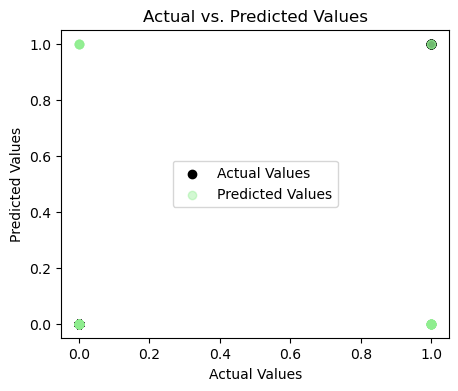

In [31]:
# Scatter plot for actual values vs predicted values
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_test, label='Actual Values', color='black')
plt.scatter(y_test, predictions, label='Predicted Values', color='lightgreen', alpha=0.4)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend(loc='center')
plt.show()

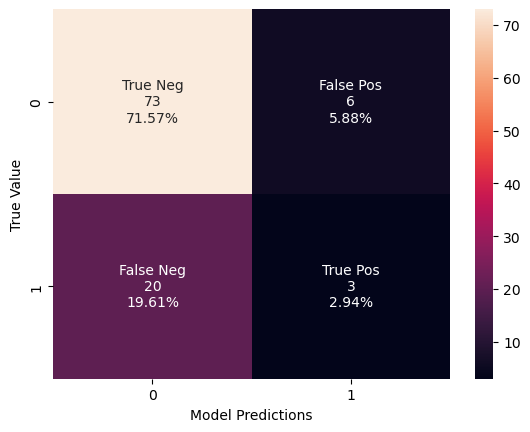

In [32]:
#Plotting a confusion matrix

cf_matrix2 = confusion_matrix(y_test, predictions)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix2.flatten() / np.sum(cf_matrix2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(cf_matrix2, annot=labels, fmt='')
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.show()


<div style="background-color: #D3D3D3; padding: 10px;">

The scatter plot, comparing predicted versus actual values from the Logistic Regression Model, displays a discernible pattern. Notably, this model exhibits superior performance in predicting instances with high salaries ('1') compared to other models.

Additionally, delving into the confusion matrix provides insightful metrics for this model. Approximately 71.57% of cases were accurately predicted as true negatives, although some errors occurred in the form of false positives. False positives indicate instances that are actually 'low salary' but were incorrectly predicted as 'high salary' by the model. Although the occurrence of false positives is minimal, the model successfully identified three instances of true positives. These observations underscore the model's strength in differentiating and predicting high salary cases while acknowledging the nuanced challenges associated with false positives.

</div>


##### Support Vector Classifier:


In [33]:
# Separating features and target variable for the test set
best_model = SVC()
best_model.fit(X_train, y_train)
X_test = test_data[column_for_train].drop(['high_salary'], axis=1)  # Reordering columns to match X_train(To ensure we are using same colums in both train and test cases)
y_test = test_data['high_salary']

# Making predictions on the test set
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'The accuracy of the model is: {accuracy}')

The accuracy of the model is: 0.7745098039215687


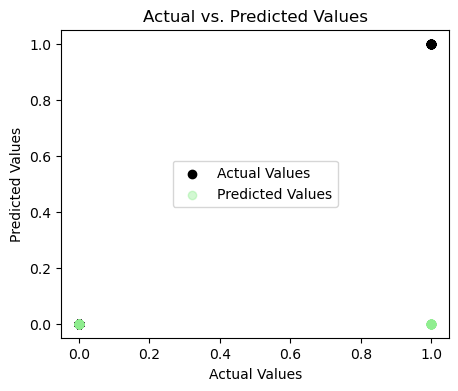

In [34]:
# Scatter plot for actual values vs predicted values
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_test, label='Actual Values', color='black')
plt.scatter(y_test, predictions, label='Predicted Values', color='lightgreen', alpha=0.4)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend(loc='center')
plt.show()

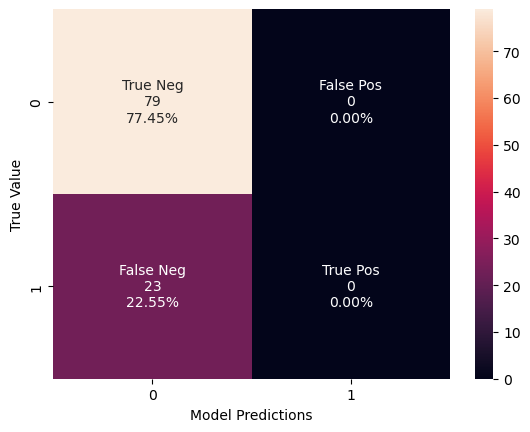

In [35]:
#Plotting a confusion matrix
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(cf_matrix, annot=labels, fmt='')
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.show()


<div style="background-color: #D3D3D3; padding: 10px;">
    
The scatter plot illustrating actual versus predicted values from the Support Vector Machines (SVM) model showcases a similar pattern to that observed in the RandomForest model. The SVM model, like the RandomForest model, excels in accurately predicting instances labeled as 0 but encounters challenges when predicting instances labeled as 1. This is evident from the distinct separation between the markers corresponding to different labels on the plot.
    

    
  Moreover, a detailed examination of the confusion matrix for the SVM model reveals consistency with the RandomForest model's performance. The SVM model demonstrates proficiency in predicting a high percentage (approximately 77.45%) of True Negative results, indicative of accurate predictions for instances where low salaries are expected. However, similar to the RandomForest model, the SVM model faces challenges with false negatives (Actual: 1, Predicted: 0), constituting 22.45% of its predictions. This consistent pattern emphasizes a notable characteristic of the SVM model—its effectiveness in predicting lower salary cases but limitations in accurately predicting instances with higher salaries.
</div>


##### Random Forest Classifier:

In [36]:
# Separating features and target variable for the test set
best_model = RandomForestClassifier(n_estimators=1000, max_depth=100, max_features='sqrt')
best_model.fit(X_train, y_train)
X_test = test_data[column_for_train].drop(['high_salary'], axis=1)  # Reordering columns to match X_train(To ensure we are using same colums in both train and test cases)
y_test = test_data['high_salary']

# Making predictions on the test set
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'The accuracy of the model is: {accuracy}')

The accuracy of the model is: 0.7745098039215687


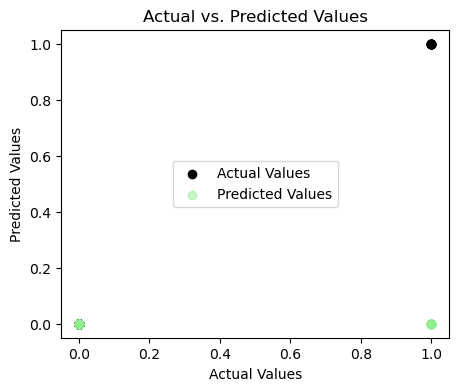

In [37]:
# Scatter plot for actual values
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_test, label='Actual Values', color='black')
plt.scatter(y_test, predictions, label='Predicted Values', color='lightgreen', alpha=0.5)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend(loc='center')
plt.show()

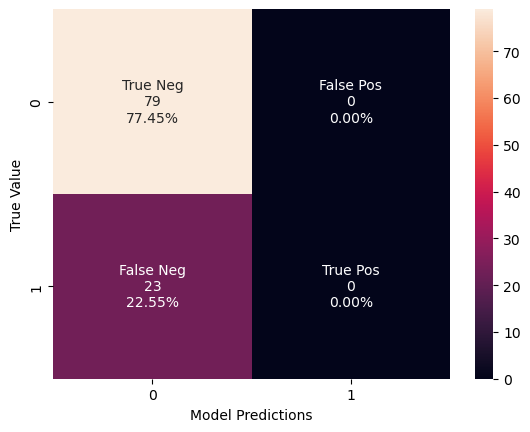

In [38]:
#Plotting  a confusion matrix

cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(cf_matrix, annot=labels, fmt='')
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.show()


<div style="background-color: #D3D3D3; padding: 10px;">

The scatter plot depicting actual values versus predicted instances from the RandomForest model reveals a distinctive pattern. While the model accurately predicts all instances labeled as 0, it encounters challenges in predicting instances labeled as 1, evident from the lack of overlap between the black and green markers on the plot.

Additionally, examining the confusion matrix provides a comprehensive view of the distribution and counts across different result categories produced by the model. Notably, the random forest model demonstrates a proficiency in predicting 77.45% of True Negative results, signifying instances where low salaries are predicted correctly. However, it struggles with false negatives (Actual: 1, Predicted: 0), constituting 22.45% of predictions. This highlights a noteworthy aspect of the model – its effectiveness in predicting lower salary cases while facing difficulties in accurately predicting instances with higher salaries.

</div>



**Table: Model Vs Accuracy**

| Model                | Accuracy Score |
| ---------------------|----------------|
| Logistic Regression  |     0.745      |
| SVC                  |     0.7745     |
| Random Forest        |     0.7745     |


<div style="background-color: #DAF7A6; padding: 10px;">
    <strong>Overall look on Module 4: </strong>
    
<p>
Among the 3 different models used above it can be observed that each models' accuracy is quite closer and falls on the range of 0.7-0.8.
    
The worst one (based on accuracy score alone) was observed to be Logistic Regression model and the best one were Random Forest Classifier and Support Vector Classifiers with a score of 0.7745.
    
Despite lower score, <span style="background-color:lightgreen">LogisitcRegression</span> was the only model which was able to correctly predict the higher salary (high_score=='1'). Among the 23 (1's) in the data, Logisitc Regression was able to get 3 true positives result and it successfully predicted 73 out of 79 (0's) from the data.

Meanwhile, <span style="background-color:lightgreen">RandomForest and Support Vector Classifiers</span> were able to accurately predict 79 instances of low salary out of 79 total cases. However, it lagged behind on predicting the high salary as None of them were predicted with 0 True Positive cases.
    
</p>
</div>


### Module 5: Summary
Summarize your findings and draw conclusions. Are there any interesting patterns that you would like to highlight?

<div style="background-color: #D3D3D3; padding: 10px;">
   
In summary, after comprehensive analysis, I've decided to adopt the Logistic Regression model as the final choice for predicting high salary instances. Its noteworthy ability to yield balanced outcomes for both high and low salary cases contributes to its selection. The accuracy, standing at 0.745, is commendable and competitive compared to other models. The plotted confusion matrix provides a visual representation, showcasing the model's proficiency in making a substantial number of correct predictions with occasional errors.

</div>




<Axes: >

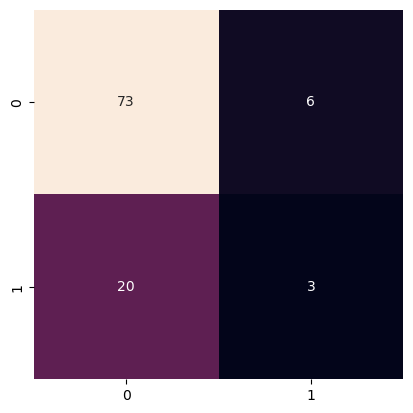

In [39]:
sns.heatmap(cf_matrix2, square=True, annot=True, cbar=False, fmt='g')

---

<div style="background-color: #D3D3D3; padding: 10px;">
   

Given the model's notable success in predicting a substantial number of cases for low salary, it suggests its effectiveness in handling such instances. However, the challenges in accurately predicting high salary cases may stem from the limited number of test cases with high salary values. Additionally, there might be other factors contributing to this, such as the imbalanced nature of the dataset or specific complexities associated with high salary instances (or maybe because of cases of outliers in test data itself).

</div>

 

An another intersting plot is to highlight the results of prediction model using Classification_report.

In [40]:
from sklearn.metrics import classification_report

# best_model2 holds our logistiregression model.

predictions = best_model2.predict(X_test)

# Generatiing the classification report
class_report = classification_report(y_test, predictions)

print("Classification Report:\n")
print(class_report)


Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.92      0.85        79
           1       0.33      0.13      0.19        23

    accuracy                           0.75       102
   macro avg       0.56      0.53      0.52       102
weighted avg       0.68      0.75      0.70       102



---

<div style="background-color: #D3D3D3; padding: 10px;">
   
The classification report reveals a model with high precision and recall for class 0 (low salary) and lower values for class 1 (High salary). The overall accuracy is 75%, and the weighted average F1-score is 0.70, suggesting a moderate performance across both classes.

</div>

--- 

In addition to the aforementioned relationships, it appears challenging to identify significant connections between variables in the dataset. The majority of the data exhibits limited inherent correlation, making it intricate to discern meaningful and easily predictable relationships.